**TASK 1    IRIS Detection**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/IRIS.csv")

In [ ]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [ ]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 96.67%


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


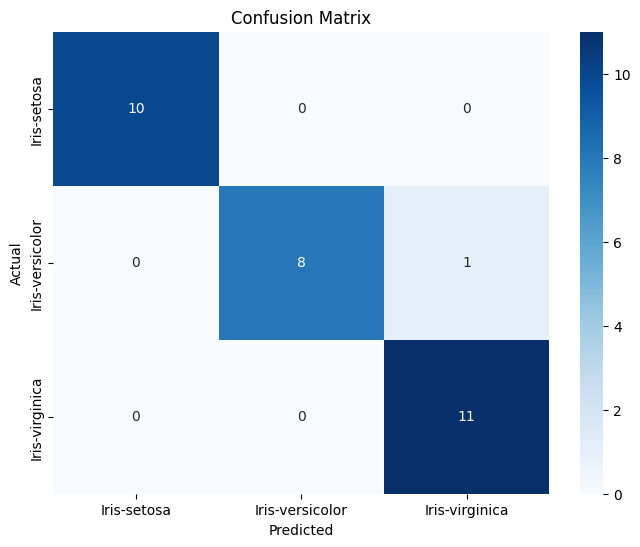

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

TASK 2    Unemployment Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/Unemployment in India.csv")

In [ ]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [ ]:
print("\nDataset information:")
print(data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None


In [ ]:
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [ ]:
data = data.drop_duplicates()

In [ ]:
data = data.dropna()

In [ ]:
print("\nColumns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [ ]:
data.rename(columns={
    'Region': 'region',
    'Date': 'date',
    'Frequency': 'frequency',
    'Estimated Unemployment Rate (%)': 'unemployment_rate',
    'Area': 'area'
}, inplace=True)

In [ ]:
print("Columns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'area'],
      dtype='object')


In [ ]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print("Standardized Columns in the dataset:")
print(data.columns)


Standardized Columns in the dataset:
Index(['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)',
       'estimated_employed', 'estimated_labour_participation_rate_(%)',
       'area'],
      dtype='object')


In [ ]:
data.rename(columns={'estimated_unemployment_rate_(%)': 'unemployment_rate'}, inplace=True)


In [ ]:
region_avg_unemployment = data.groupby('region')['unemployment_rate'].mean().sort_values()
print(region_avg_unemployment)


region
Meghalaya            4.798889
Odisha               5.657857
Assam                6.428077
Uttarakhand          6.582963
Gujarat              6.663929
Karnataka            6.676071
Sikkim               7.249412
Madhya Pradesh       7.406429
Andhra Pradesh       7.477143
Maharashtra          7.557500
Telangana            7.737857
West Bengal          8.124643
Chhattisgarh         9.240357
Goa                  9.274167
Tamil Nadu           9.284286
Kerala              10.123929
Puducherry          10.215000
Punjab              12.031071
Uttar Pradesh       12.551429
Rajasthan           14.058214
Chandigarh          15.991667
Jammu & Kashmir     16.188571
Delhi               16.495357
Himachal Pradesh    18.540357
Bihar               18.918214
Jharkhand           20.585000
Haryana             26.283214
Tripura             28.350357
Name: unemployment_rate, dtype: float64


In [ ]:
print("\nAverage Unemployment Rate by Region:")
print(region_avg_unemployment)


Average Unemployment Rate by Region:
region
Meghalaya            4.798889
Odisha               5.657857
Assam                6.428077
Uttarakhand          6.582963
Gujarat              6.663929
Karnataka            6.676071
Sikkim               7.249412
Madhya Pradesh       7.406429
Andhra Pradesh       7.477143
Maharashtra          7.557500
Telangana            7.737857
West Bengal          8.124643
Chhattisgarh         9.240357
Goa                  9.274167
Tamil Nadu           9.284286
Kerala              10.123929
Puducherry          10.215000
Punjab              12.031071
Uttar Pradesh       12.551429
Rajasthan           14.058214
Chandigarh          15.991667
Jammu & Kashmir     16.188571
Delhi               16.495357
Himachal Pradesh    18.540357
Bihar               18.918214
Jharkhand           20.585000
Haryana             26.283214
Tripura             28.350357
Name: unemployment_rate, dtype: float64


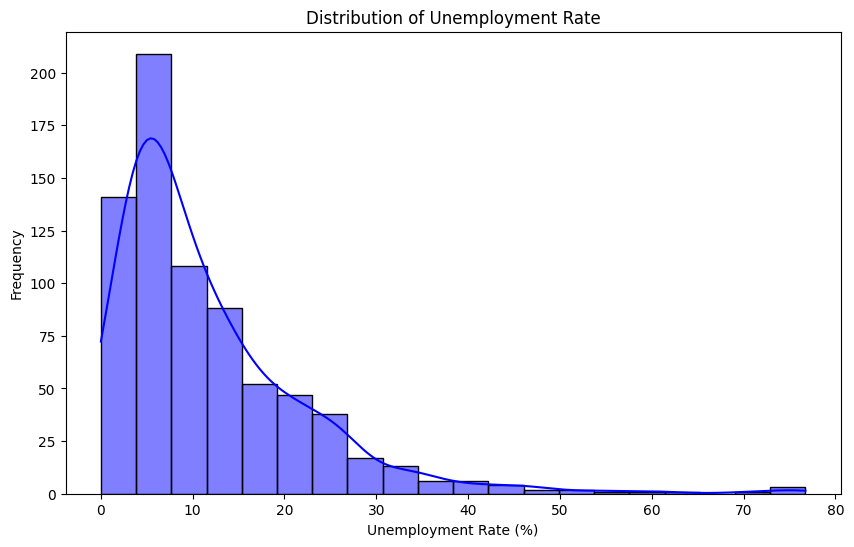

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['unemployment_rate'], kde=True, bins=20, color='blue')
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

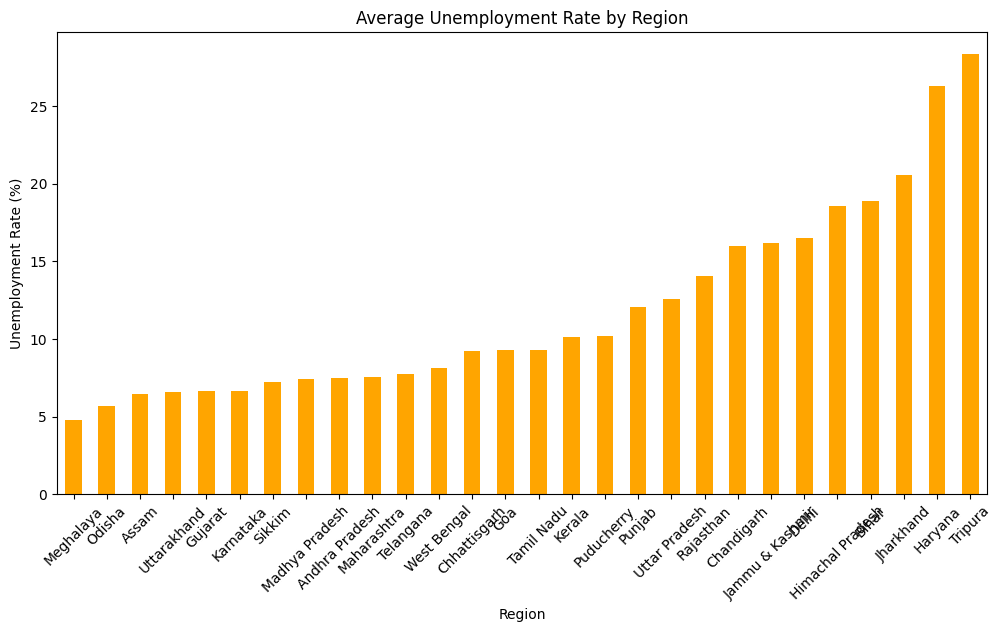

In [ ]:
plt.figure(figsize=(12, 6))
region_avg_unemployment.plot(kind='bar', color='orange')
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
print("Numeric columns used for correlation:\n", numeric_data.columns)


Numeric columns used for correlation:
 Index(['unemployment_rate', 'estimated_employed',
       'estimated_labour_participation_rate_(%)'],
      dtype='object')


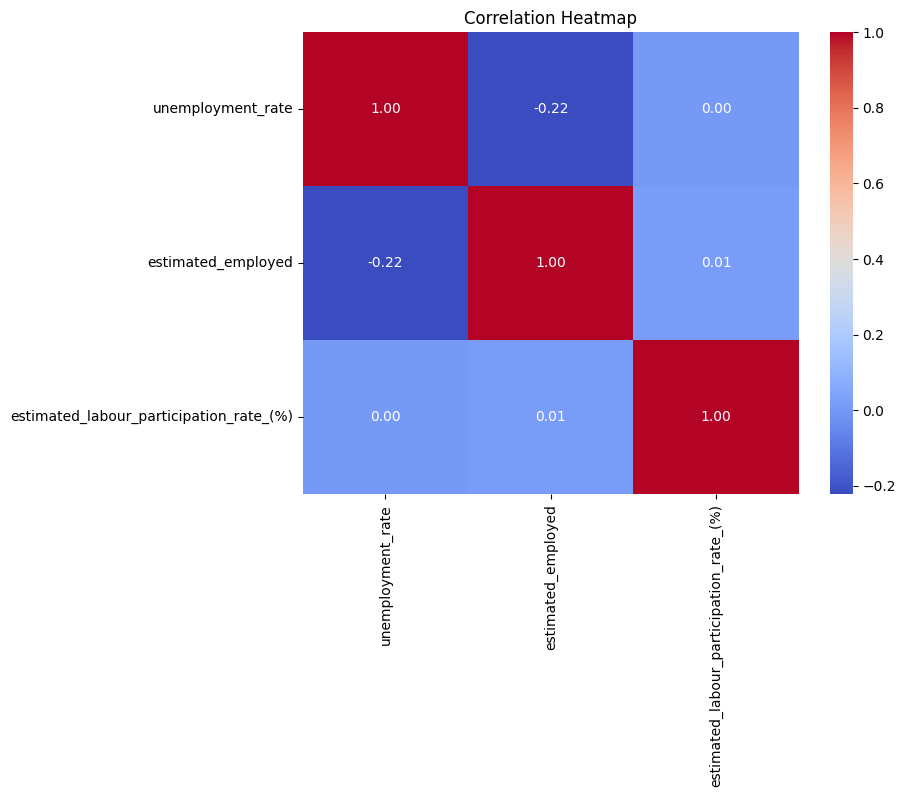

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**TASK 3    Car Price Prediction**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("/content/car_price_prediction.csv")

print("\nDataset Columns:")
print(data.columns)

data.replace('-', pd.NA, inplace=True)

data = data.apply(pd.to_numeric, errors='coerce')


print("\nMissing values count in each column:")
print(data.isnull().sum())

numerical_columns = ['Price', 'Engine volume', 'Mileage', 'Cylinders', 'Doors', 'Wheel']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

le = LabelEncoder()
categorical_columns = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
                       'Gear box type', 'Drive wheels', 'Color', 'Airbags']

for col in categorical_columns:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

X = data.drop(['ID', 'Price'], axis=1, errors='ignore')
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")



Dataset Columns:
Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

Missing values count in each column:
ID                      0
Price                   0
Levy                 5819
Manufacturer        19237
Model               18544
Prod. year              0
Category            19237
Leather interior    19237
Fuel type           19237
Engine volume        1931
Mileage             19237
Cylinders               0
Gear box type       19237
Drive wheels        19237
Doors               19237
Wheel               19237
Color               19237
Airbags                 0
dtype: int64

Model Evaluation:
Mean Absolute Error (MAE): 12456.88067044047
Mean Squared Error (MSE): 23601253597.377224
R-squared (R²): -74.74297179528304


In [ ]:
new_car = pd.DataFrame({
    'Engine volume': [2.5],
    'Mileage': [50000],
    'Cylinders': [4],
    'Doors': [4],
    'Wheel': [17],
    'Manufacturer': [0],
    'Model': [1],
    'Category': [2],
    'Leather interior': [1],
    'Fuel type': [0],
    'Gear box type': [1],
    'Drive wheels': [1],
    'Color': [5],
    'Airbags': [2],
    'Levy': [0],
    'Prod. year': [2018]
})

new_car = new_car[X.columns]

predicted_price = model.predict(new_car)
print(f"Predicted Price of the New Car: {predicted_price[0]}")


Predicted Price of the New Car: 38251.299585131535


Mean Absolute Error: 6709.918356721638
Mean Squared Error: 1381002009.061559
R-squared: -3.432018654856667


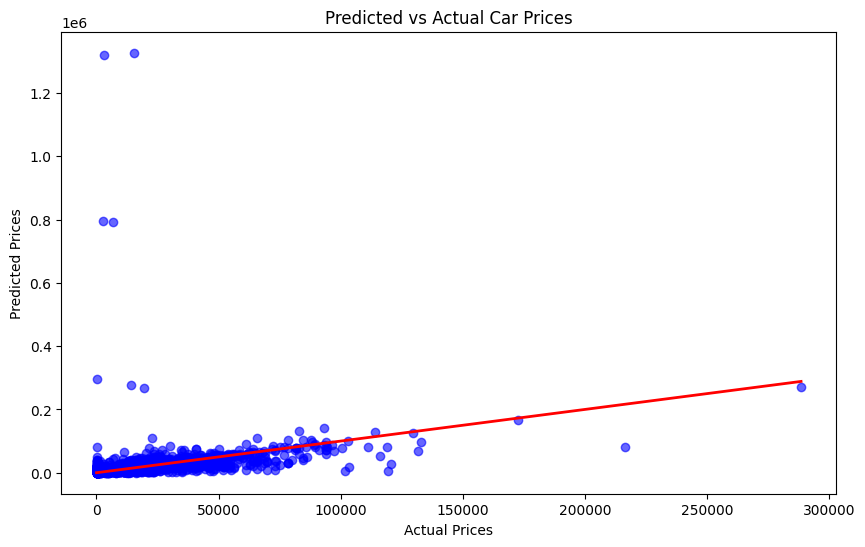

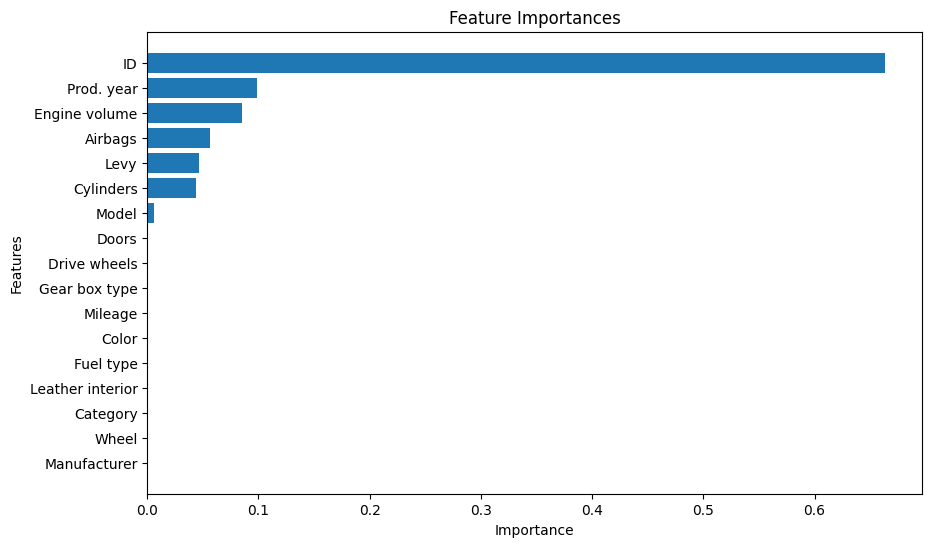

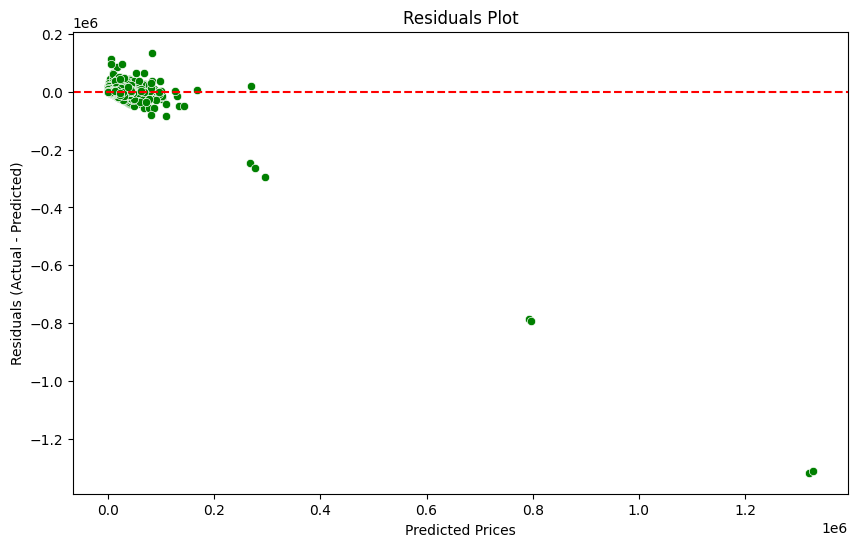

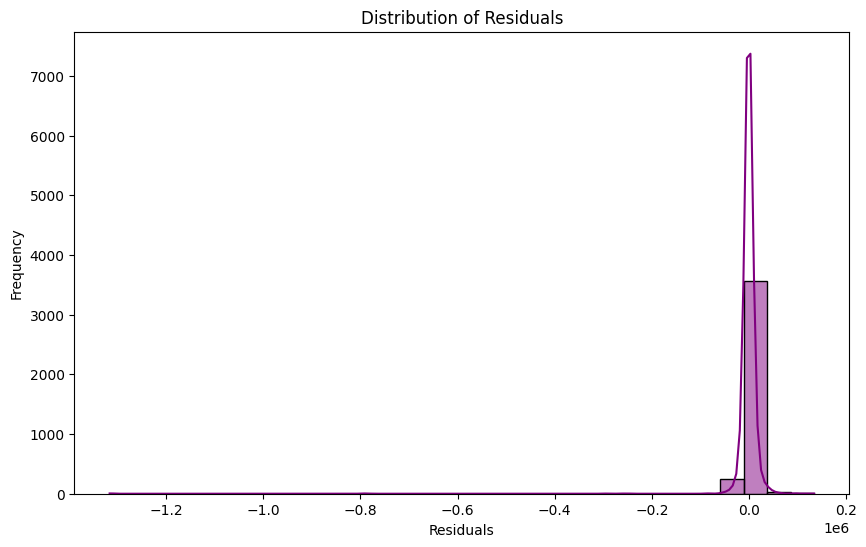

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


data = pd.read_csv("/content/car_price_prediction.csv")


data.replace("-", np.nan, inplace=True)

data = data.apply(pd.to_numeric, errors='coerce')

numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

categorical_columns = data.select_dtypes(exclude=[np.number]).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))

X = data.drop("Price", axis=1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.title("Predicted vs Actual Car Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

plt.figure(figsize=(10, 6))
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), features[indices])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


**TASK 4   Email Spam Detection**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/spam.csv')

In [ ]:
data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf_vectorizer.fit_transform(data['Message'])

In [ ]:
y = data['Category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy*100:.2f}%")

Accuracy of the model: 98.21%


In [ ]:
cm = confusion_matrix(y_test, y_pred)

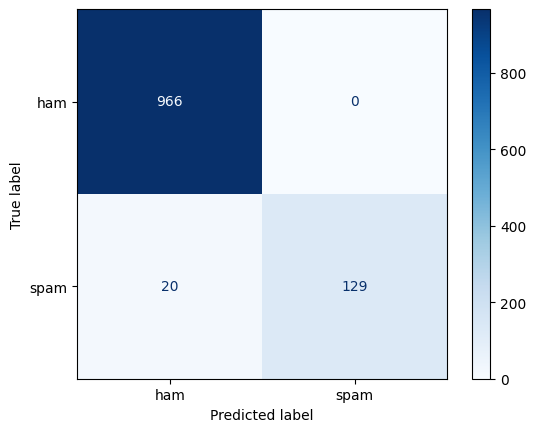

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
disp.plot(cmap='Blues')

In [ ]:
plt.show()

In [ ]:
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[966   0]
 [ 20 129]]


In [ ]:
new_message = ["Congratulations! You've won a free gift card. Click here to claim."]
new_message_tfidf = tfidf_vectorizer.transform(new_message)

In [ ]:
predicted_label = model.predict(new_message_tfidf)
predicted_category = "spam" if predicted_label == 1 else "ham"

In [ ]:
print(f"\nPredicted category for new message: {predicted_category}")


Predicted category for new message: spam


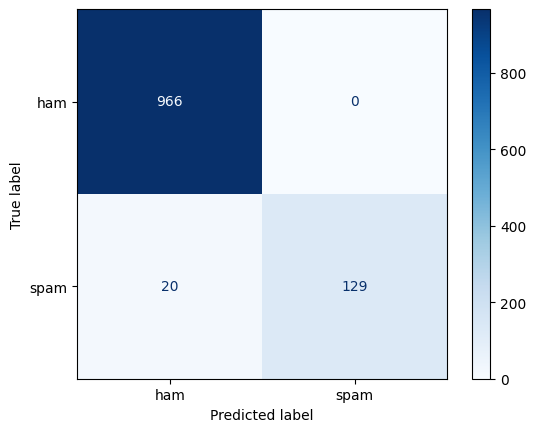


Confusion Matrix:
[[966   0]
 [ 20 129]]

Ham (non-spam) Specific Metrics:
True Positives (TP) for ham: 966
False Negatives (FN) for ham: 0
Precision for ham: 1.00
Recall for ham: 1.00

Predicted category for new ham message: ham


In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
disp.plot(cmap='Blues')

plt.show()

print("\nConfusion Matrix:")
print(cm)


TP_ham = cm[0, 0]
FN_ham = cm[0, 1]


precision_ham = TP_ham / (TP_ham + FN_ham) if (TP_ham + FN_ham) != 0 else 0
recall_ham = TP_ham / (TP_ham + FN_ham) if (TP_ham + FN_ham) != 0 else 0

print(f"\nHam (non-spam) Specific Metrics:")
print(f"True Positives (TP) for ham: {TP_ham}")
print(f"False Negatives (FN) for ham: {FN_ham}")
print(f"Precision for ham: {precision_ham:.2f}")
print(f"Recall for ham: {recall_ham:.2f}")

new_ham_message = ["Hey, how are you doing?"]
new_ham_message_tfidf = tfidf_vectorizer.transform(new_ham_message)

predicted_label = model.predict(new_ham_message_tfidf)
predicted_category = "spam" if predicted_label == 1 else "ham"

print(f"\nPredicted category for new ham message: {predicted_category}")


**TASK 5   Sales Prediction**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/advertising.csv')


In [ ]:
data.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


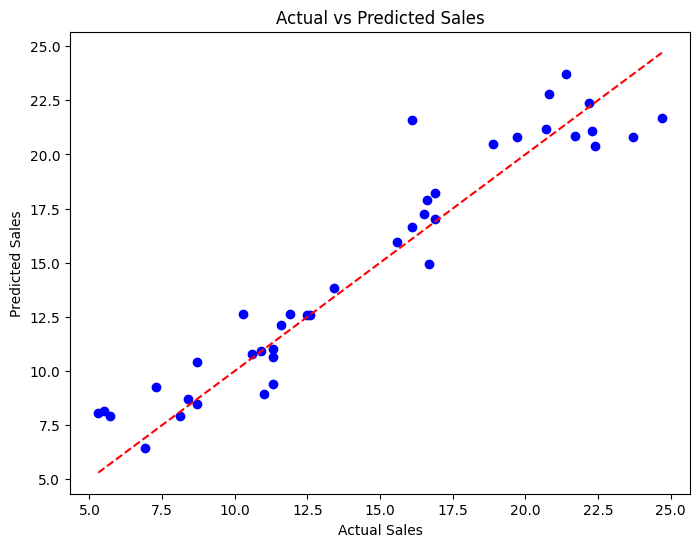

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

In [ ]:
new_data = pd.DataFrame({
    'TV': [150],
    'Radio': [50],
    'Newspaper': [30]
})

In [ ]:
predicted_sales = model.predict(new_data)
print(f'Predicted Sales for new data: {predicted_sales[0]}')

Predicted Sales for new data: 18.0678845521059
